In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from nltk.stem.porter import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords
ps = PorterStemmer()
import string

In [268]:
data = pd.read_csv('spam.csv', encoding='latin-1')

# 1.Data Cleaning

In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB




## Drop last 3 Columns


In [270]:
data = data.iloc[:, :-3] 



In [271]:
data.sample(5)

,v1,v2
663,ham,Leave it de:-). Start Prepare for next:-)..
2929,ham,Wat's my dear doing? Sleeping ah?
3741,ham,Hey i'm bored... So i'm thinking of u... So wa...
4788,ham,We're on the opposite side from where we dropp...
616,ham,He like not v shock leh. Cos telling shuhui is...


## Renaming Columns


In [272]:

data.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)

In [273]:
data.sample(5)

,Target,Text
5216,ham,I am late. I will be there at
3577,ham,They said Ì_ dun haf passport or smth like dat...
4973,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...
5158,ham,I will come with karnan car. Please wait till ...
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...


In [274]:
encoder = LabelEncoder()
data["Target"] = encoder.fit_transform(data["Target"])
data.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [275]:
# Missing Values
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [276]:
# Checking for Duplicate values
data.duplicated().sum()

403

In [277]:
#Remove Duplicates
data = data.drop_duplicates(keep="first")

In [278]:
data.duplicated().sum()

0

In [279]:
data.shape

(5169, 2)

# 2. EDA

In [280]:
data["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

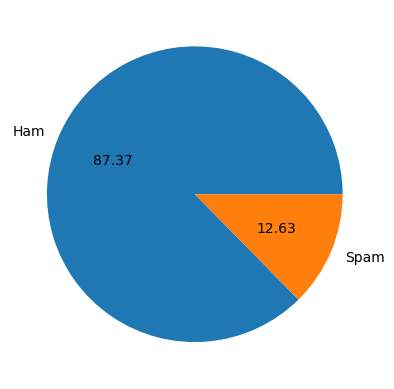

In [281]:
plt.pie(data["Target"].value_counts(), labels=["Ham", "Spam"], autopct="%0.2f")
plt.show()

In [282]:
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/salarmohmand/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salarmohmand/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [283]:
data["Num_Characters"] = data["Text"].apply(len)

In [284]:
data.head()

,Target,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [285]:
#num of words
data["Num_Words"] = data["Text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [286]:
data.head()

,Target,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [287]:
data["Num_Sentences"] = data["Text"].apply(lambda x:len((nltk.sent_tokenize(x))))

In [288]:
data.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [289]:
data[["Num_Characters", "Num_Words", "Num_Sentences"]].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [290]:
#For Non-Spam Email
data[data["Target"] == 0][["Num_Characters", "Num_Words", "Num_Sentences"]].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [291]:
#For Spam Email
data[data["Target"] == 1][["Num_Characters", "Num_Words", "Num_Sentences"]].describe()

,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


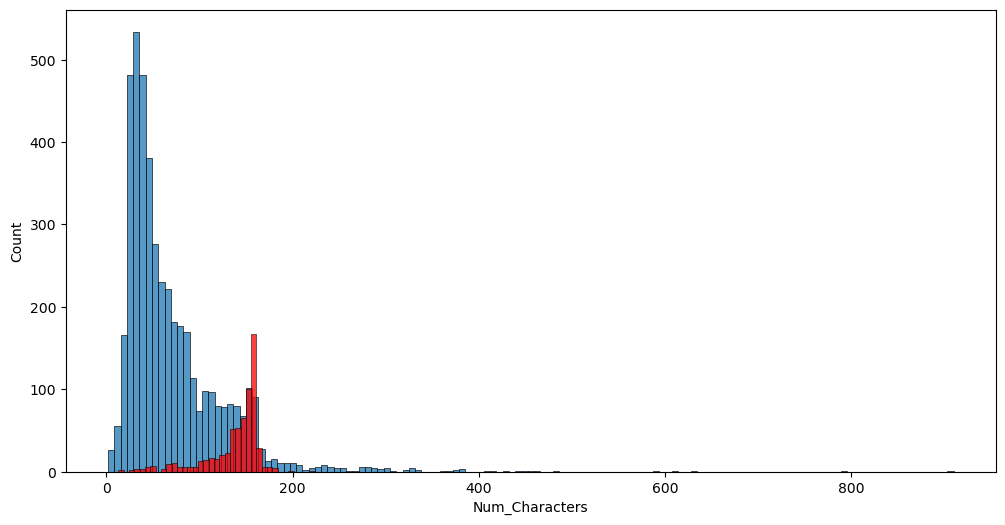

In [292]:
# Import Seaborn for Histplot
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(data[data["Target"] == 0]["Num_Characters"])
sns.histplot(data[data["Target"] == 1]["Num_Characters"],color="red")

plt.show()

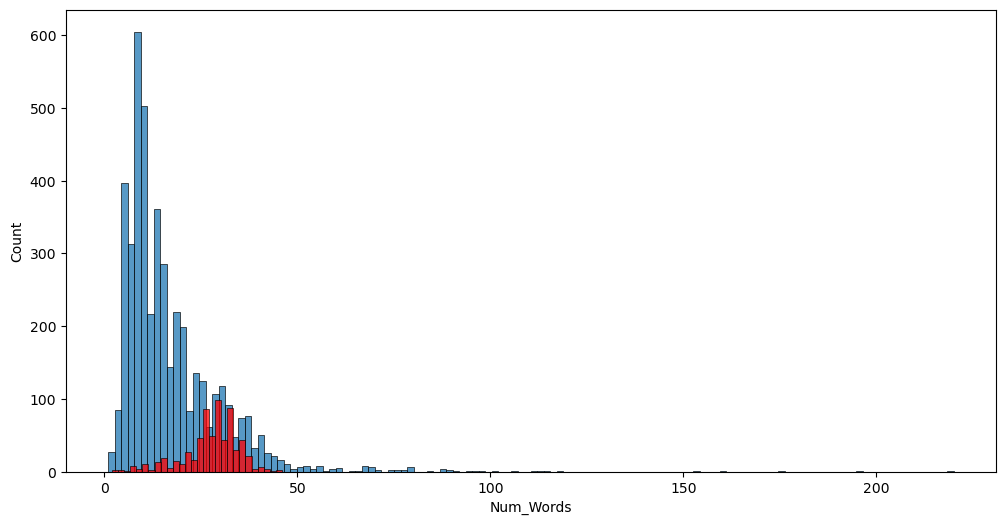

In [293]:
plt.figure(figsize=(12,6))
sns.histplot(data[data["Target"] == 0]["Num_Words"])
sns.histplot(data[data["Target"] == 1]["Num_Words"],color="red")

plt.show()

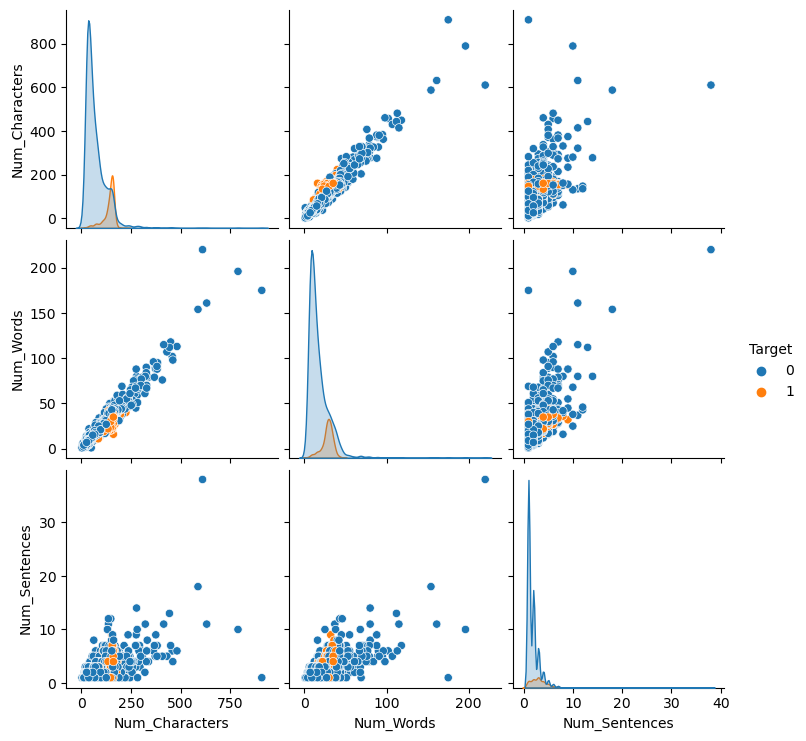

In [294]:
sns.pairplot(data,hue="Target")

/var/folders/ds/4j9j5cb12j94fb_k7_np7slw0000gn/T/ipykernel_2281/3037263661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

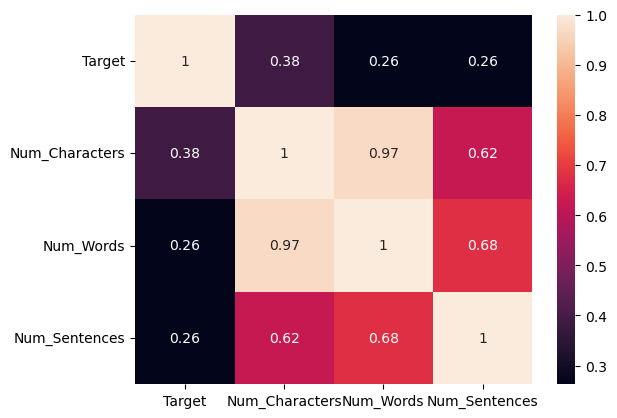

In [295]:
sns.heatmap(data.corr(),annot=True)


# 3. DATA PREPROCESSING
#### Lower case
#### Tokenization
#### Removing special characters
#### Removing stop words and punctuation
#### Stemming

In [296]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append((ps.stem(i)))
            
    return " ".join(y)

In [297]:
data["Transformed_text"] = data["Text"].apply(transform_text)

In [298]:
data.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [299]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [300]:
spam_wc = wc.generate(data[data["Target"]==1]["Transformed_text"].str.cat(sep=" "))

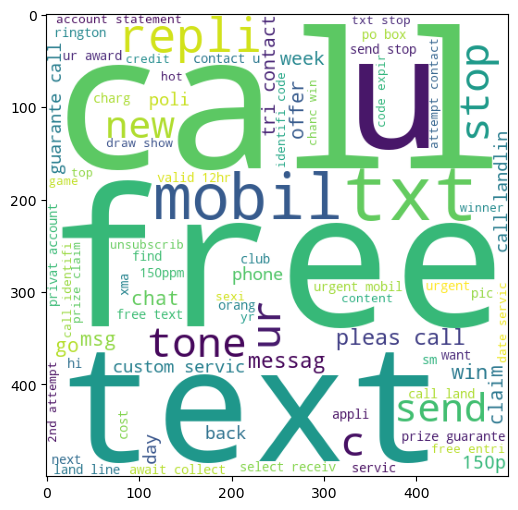

In [301]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [302]:
nonspam_wc = wc.generate(data[data["Target"]==1]["Transformed_text"].str.cat(sep=" "))

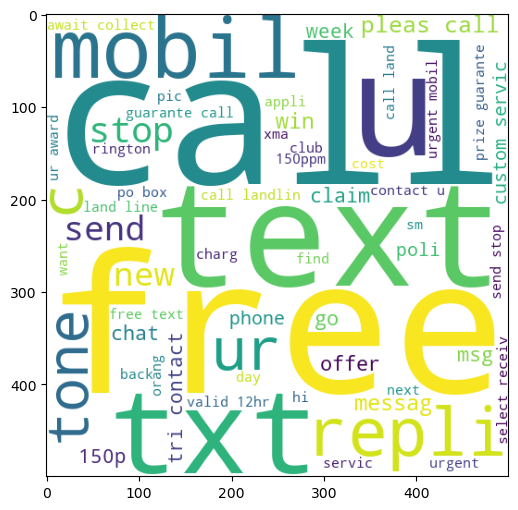

In [303]:
plt.figure(figsize=(15,6))
plt.imshow(nonspam_wc)

In [304]:
spam_corpus = []
for msg in data[data["Target"]==1]["Transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [305]:
len(spam_corpus)

9939

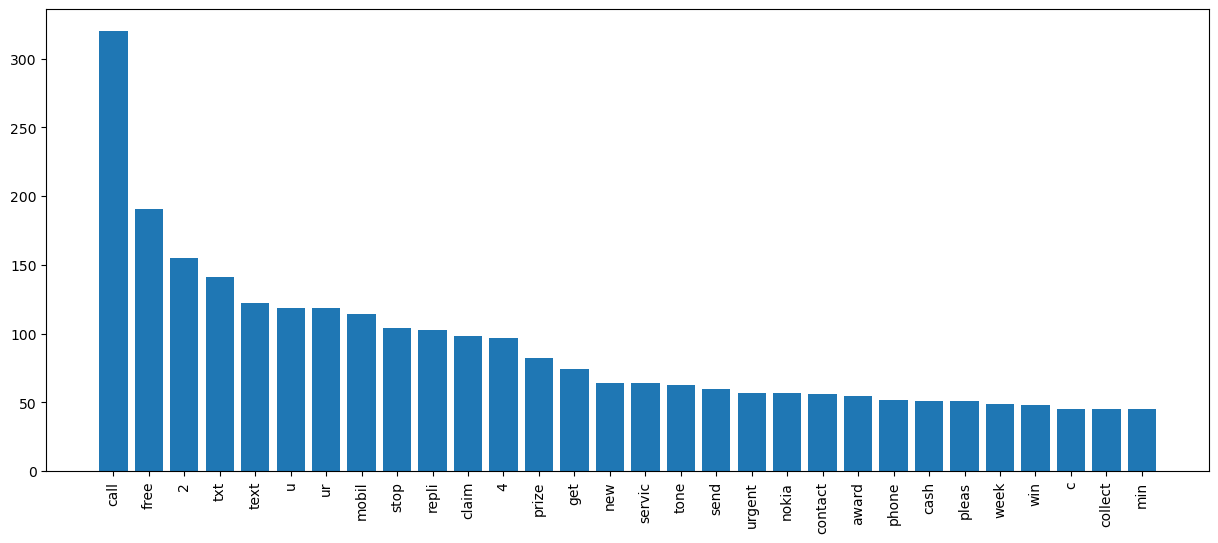

In [306]:
plt.figure(figsize=(15,6))
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [307]:
nonspam_corpus = []
for msg in data[data["Target"]==0]["Transformed_text"].tolist():
    for word in msg.split():
        nonspam_corpus.append(word)

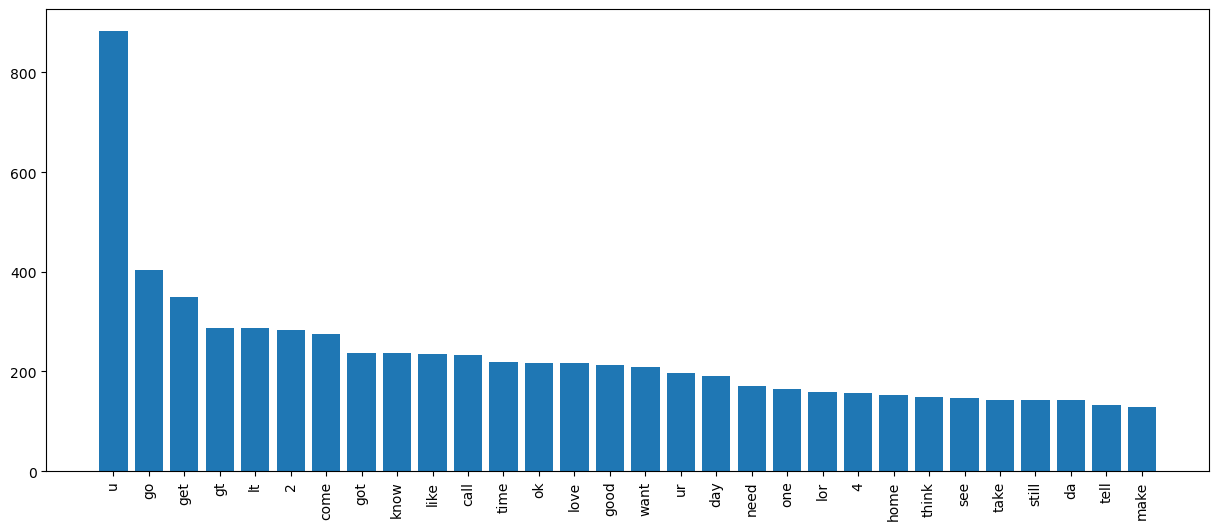

In [308]:
plt.figure(figsize=(15,6))
plt.bar(pd.DataFrame(Counter(nonspam_corpus).most_common(30))[0],pd.DataFrame(Counter(nonspam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

# 4. Model Building

In [309]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data["Transformed_text"]).toarray()

In [310]:
X.shape

(5169, 6708)

In [311]:
y = data["Target"].values

In [312]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [313]:
gnb = GaussianNB()
clf = DecisionTreeClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [314]:
algos = {
    "GNB" : gnb,
    "CLF" : clf,
    "MNB" : mnb,
    "BNB" : bnb
}

In [342]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

def train_classifier(algo, X_train, Y_train, X_test, Y_test):
    algo.fit(X_train, Y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    confi = confusion_matrix(Y_test, y_pred)
    return accuracy, precision, confi


For GNB
Accuracy 0.8762088974854932
Precision 0.49838187702265374


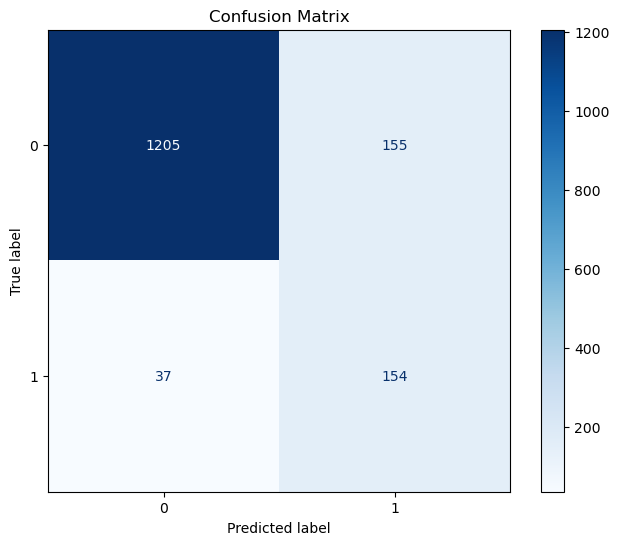

For CLF
Accuracy 0.9561573178594455
Precision 0.8288770053475936


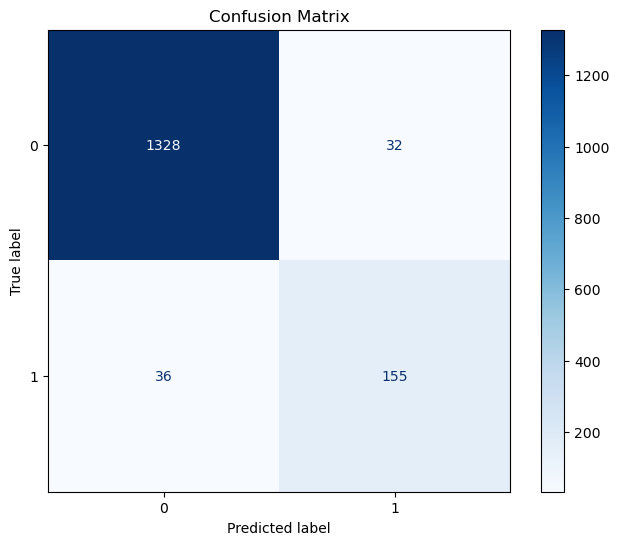

For MNB
Accuracy 0.9555125725338491
Precision 1.0


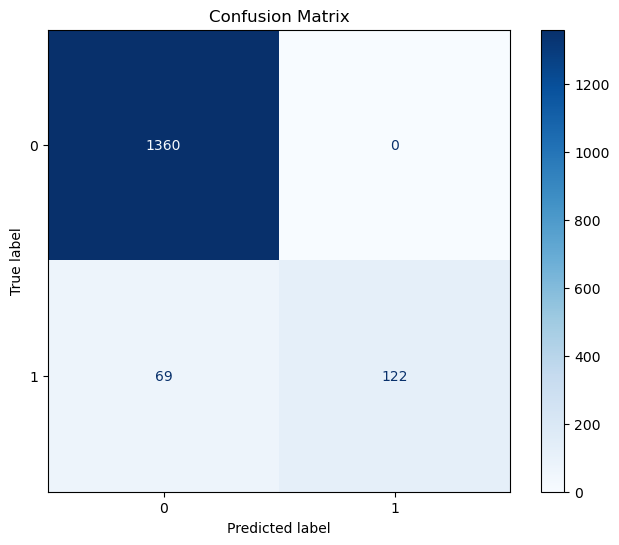

For BNB
Accuracy 0.9696969696969697
Precision 0.9736842105263158


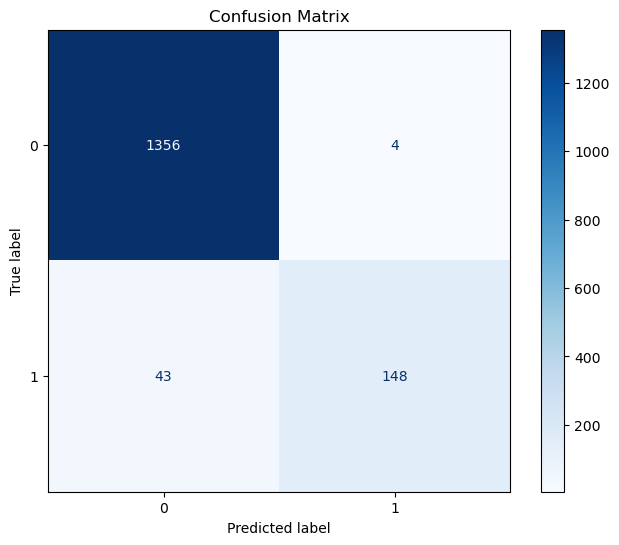

In [400]:
accuracy_scores = []
precision_scores = []
confi_scores = []
for name,alg in algos.items():
    current_accuracy,current_precision,confi= train_classifier(alg,X_train,Y_train,X_test,Y_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("Precision", current_precision)
    disp = ConfusionMatrixDisplay(confusion_matrix=confi, display_labels=[0,1])

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title("Confusion Matrix")
    plt.show()
    confi_scores.append(confi)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [418]:
performance_df = pd.DataFrame({'Algorithm':algos.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,}).sort_values('Precision',ascending=False)


In [419]:
performance_df

,Algorithm,Accuracy,Precision
2,MNB,0.955513,1.000000
3,BNB,0.969697,0.973684
1,CLF,0.956157,0.828877
0,GNB,0.876209,0.498382


In [231]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [232]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.955513
1,BNB,Accuracy,0.969697
2,CLF,Accuracy,0.957447
3,GNB,Accuracy,0.876209
4,MNB,Precision,1.000000
5,BNB,Precision,0.973684
6,CLF,Precision,0.845304
7,GNB,Precision,0.498382
